<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_32_Classification_Models_Comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.count()

,0
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df1 = df.copy()

In [10]:
unique_values = df1['Species'].unique()
unique_values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Species'] = le.fit_transform(df1['Species'])

In [45]:
x = df1.iloc[:, 1:-1]
y = df1.iloc[:, -1]   # Only the last column

In [46]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [48]:
from sklearn.model_selection import train_test_split


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=3)


In [50]:
x_train.shape


(105, 4)

In [51]:
x_test.shape


(45, 4)

# 1. SVM CLASSIFICATION

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification


In [53]:
model = SVC()


In [54]:
model.fit(x_train, y_train)


SVC()

In [55]:
y_predict = model.predict(x_test)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

In [57]:
cm

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]])

In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<Axes: >

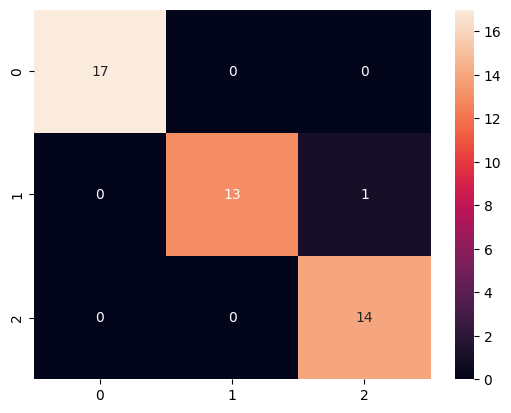

In [59]:
import seaborn as sns
sns.heatmap(cm,annot=True)


# 2. KNN Classification

In [60]:
from sklearn.neighbors import KNeighborsClassifier


In [79]:
knnModel = KNeighborsClassifier(n_neighbors=3)


In [80]:
knnModel.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [81]:
y_predict2 = knnModel.predict(x_test)

In [82]:
cm2 = confusion_matrix(y_test, y_predict2)

In [83]:
cm2

array([[17,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 14]])

<Axes: >

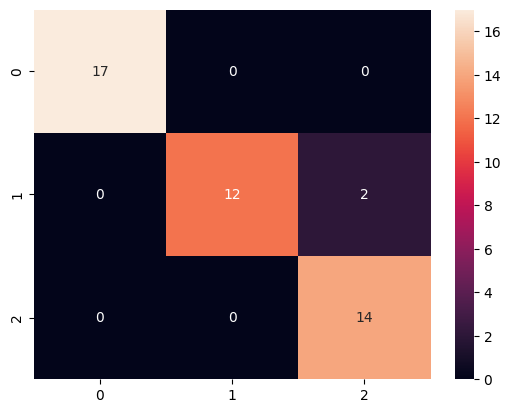

In [84]:
sns.heatmap(cm2,annot=True)


# 3. Logistical regression

In [67]:
from sklearn.linear_model import LogisticRegression


In [68]:
logisticRegressionModel = LogisticRegression()


In [69]:
logisticRegressionModel.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_predict3 = logisticRegressionModel.predict(x_test)


In [71]:
cm3 = confusion_matrix(y_test, y_predict3)

In [72]:
cm3

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]])

<Axes: >

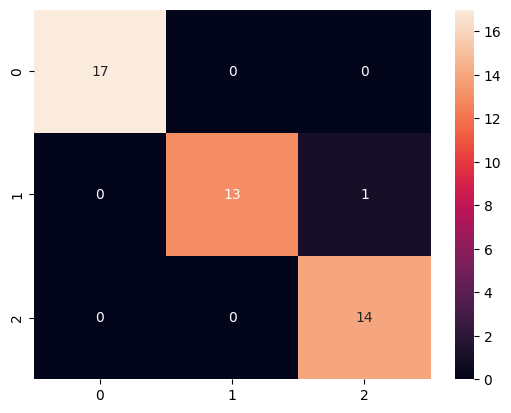

In [73]:
sns.heatmap(cm3,annot=True)


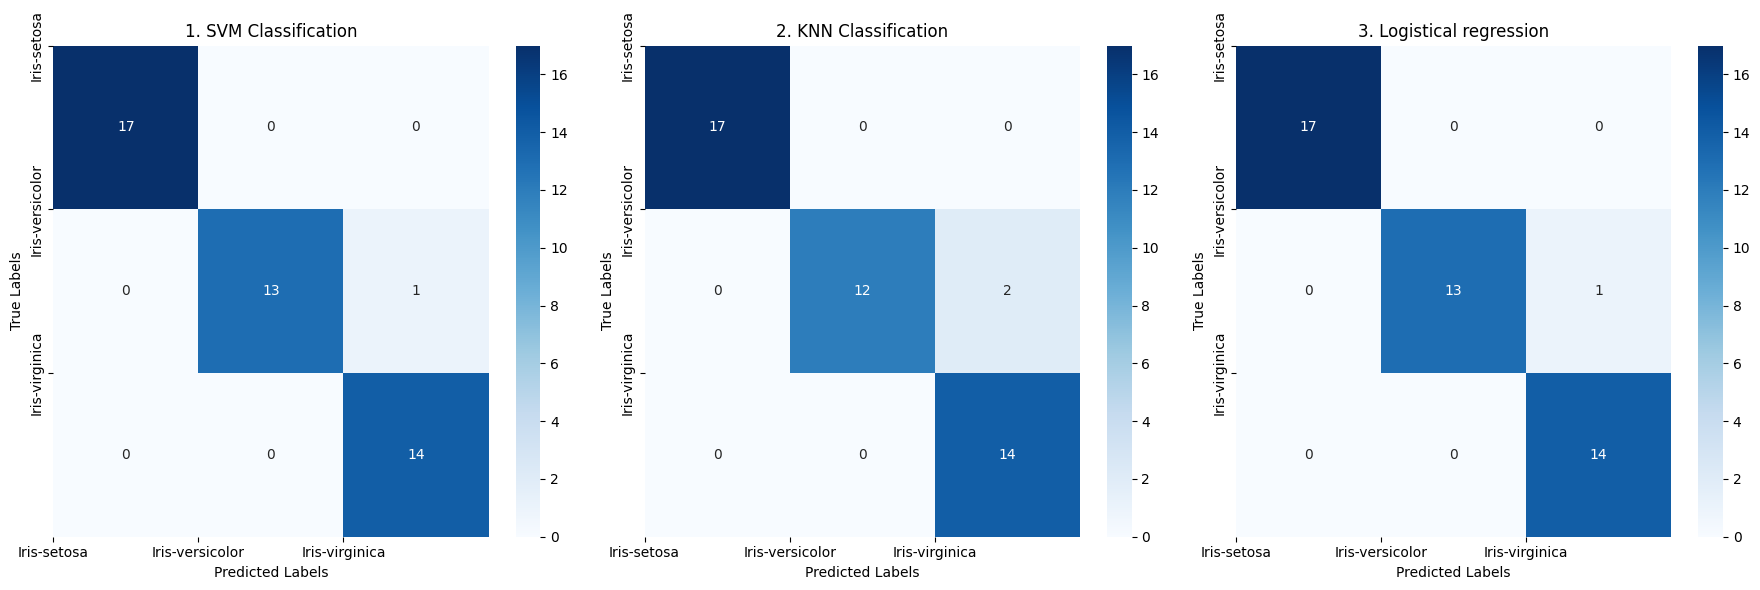

In [85]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Define the labels for the confusion matrices
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first confusion matrix
sns.heatmap(cm, ax=axs[0], annot=True, cmap='Blues', fmt='d')
axs[0].set_title('1. SVM Classification')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_xticks([0, 1, 2])
axs[0].set_yticks([0, 1, 2])
axs[0].set_xticklabels(labels)
axs[0].set_yticklabels(labels)

# Plot the second confusion matrix
sns.heatmap(cm2, ax=axs[1], annot=True, cmap='Blues', fmt='d')
axs[1].set_title('2. KNN Classification')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_xticks([0, 1, 2])
axs[1].set_yticks([0, 1, 2])
axs[1].set_xticklabels(labels)
axs[1].set_yticklabels(labels)

# Plot the third confusion matrix
sns.heatmap(cm3, ax=axs[2], annot=True, cmap='Blues', fmt='d')
axs[2].set_title('3. Logistical regression')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_xticks([0, 1, 2])
axs[2].set_yticks([0, 1, 2])
axs[2].set_xticklabels(labels)
axs[2].set_yticklabels(labels)

# Layout so plots do not overlap
fig.tight_layout()

plt.show()
